In [264]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['ggplot'])
sns.set_palette("deep", 10)
plt.figure(figsize=(12,6))

# Laster inn kommaseparert csv-fil til pandas dataframe
df = pd.read_csv("googleplaystore.csv", sep=",")

#______________ Opprydding ______________

# Je
# Forskyver deler av raden et hakk til høyre og setter den manglende verdien til NaN
#df.iloc[[10472], [2,3,4,5,6,7,8,9,10,11,12]] = df.iloc[[10472], [1,2,3,4,5,6,7,8,9,10,11]]
#df.iloc[[10472], [1]] = np.isnan

# Valgte å fjerne raden med feil antall kolonner
df = df.drop(df.index[10472])



# Fjerne duplikater. Altså rader med samme app-navn
df = df.drop_duplicates(subset=['App'])

# Bytter ut k med 000, M med 000000 og Varies with device til -1 og gjør om til heltall (int)
df['Size'] = df['Size'].replace({'k': '*1e3', 'M': '*1e6', 'Varies with device':'-1'}, regex=True).map(pd.eval).astype(int)

# Endrer type til int
df['Reviews'] = df['Reviews'].astype(int)

df['Rating'] = df['Rating'].astype(float)

# Fjerner alt som ikke er tall i kkolonene Installs og Price og gjør om til tall med passende datatype
df = df.assign(
    Installs = pd.to_numeric(df['Installs'].str.replace('[^0-9.]', '', regex=True)),
    Price = pd.to_numeric(df['Price'].str.replace('[^0-9.]', '', regex=True))
)

# Endre streng til standard datoformat 
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%B %d, %Y')

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


<Figure size 1200x600 with 0 Axes>

In [265]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                       int64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

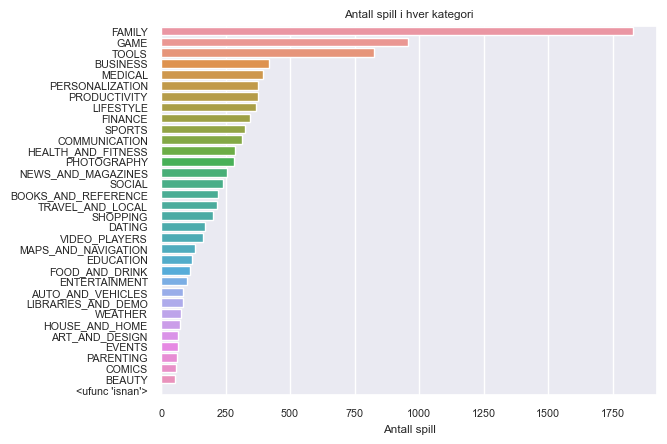

In [266]:
antall_Cat = df['Category'].value_counts()
#print(antall_Cat)
sns.set(font_scale=0.7)
plt.title('Antall spill i hver kategori')
sns.barplot(x=antall_Cat, y=antall_Cat.index)
plt.xlabel('Antall spill')
plt.show()

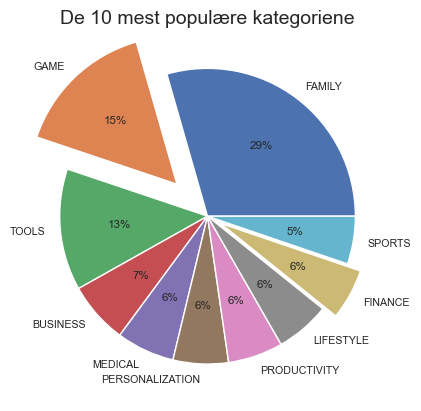

In [267]:
plt.title('De 10 mest populære kategoriene', size=14)
plt.pie(antall_Cat[:10], labels=antall_Cat[:10].index, explode = [0,0.3,0,0,0,0,0,0,0.1,0], autopct='%.0f%%')
plt.show()

In [268]:
df_pop = df[df['Installs'] > 10_000][df['Rating'] >= 4.9].sort_values(by = 'Reviews', ascending=False)[['App','Installs','Rating','Reviews']]
df_pop.head(5)

/var/folders/0h/pp5g9p3x6yb_j3l0x6s_hz4r0000gn/T/ipykernel_1132/736636298.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pop = df[df['Installs'] > 10_000][df['Rating'] >= 4.9].sort_values(by = 'Reviews', ascending=False)[['App','Installs','Rating','Reviews']]


,App,Installs,Rating,Reviews
9625,JW Library,10000000,4.9,922752
1260,Six Pack in 30 Days - Abs Workout,10000000,4.9,272337
79,Tickets + PDA 2018 Exam,1000000,4.9,197136
712,"Learn Japanese, Korean, Chinese Offline & Free",1000000,4.9,133136
1307,StrongLifts 5x5 Workout Gym Log & Personal Tra...,1000000,4.9,66791


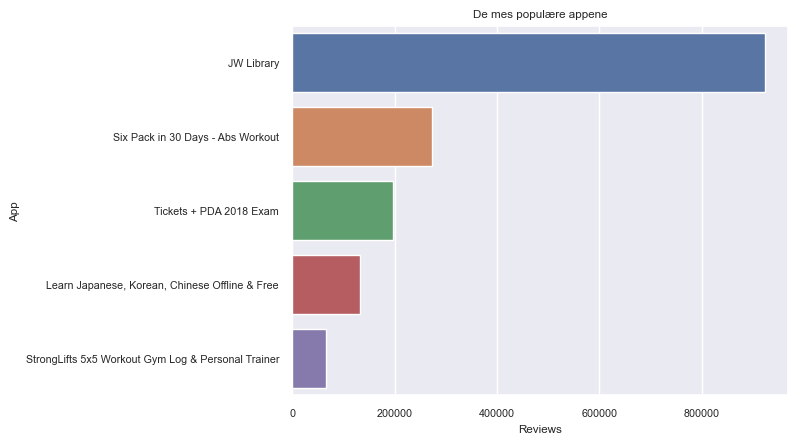

In [269]:
plt.title('De mes populære appene')
sns.barplot(x='Reviews', y='App', data=df_pop.head(5))
plt.show()

In [270]:
df_pop2 = df[df['Installs'] >= 1000000000].sort_values(by = 'Reviews', ascending=False).head(10).sort_values(by = 'Rating', ascending=False)
df_pop2 = df_pop2[['App','Rating','Reviews']]
df_pop2

,App,Rating,Reviews
2545,Instagram,4.5,66577313
1654,Subway Surfers,4.5,27722264
2808,Google Photos,4.5,10858556
336,WhatsApp Messenger,4.4,69119316
3665,YouTube,4.3,25655305
338,Google Chrome: Fast & Secure,4.3,9642995
3117,Maps - Navigate & Explore,4.3,9235155
2544,Facebook,4.1,78158306
391,Skype - free IM & video calls,4.1,10484169
335,Messenger – Text and Video Chat for Free,4.0,56642847


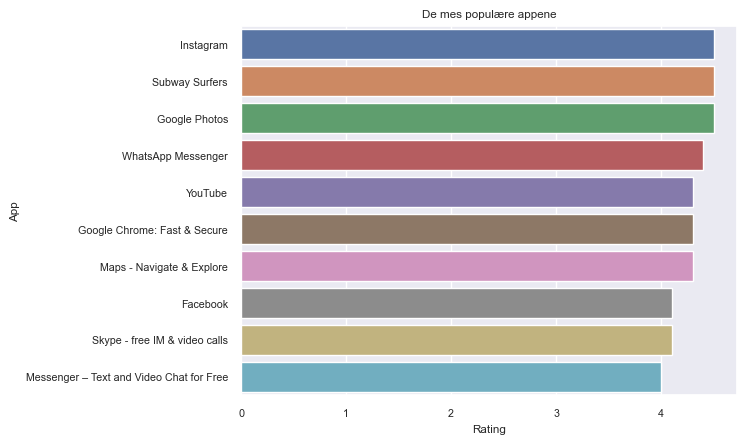

In [271]:
plt.title('De mes populære appene')
sns.barplot(x='Rating', y='App', data=df_pop2)
plt.show()

In [272]:
df.loc[df['Last Updated'].idxmin()]

App               FML F*ck my life + widget
Category                             FAMILY
Rating                                  4.2
Reviews                                1415
Size                                 209000
Installs                             100000
Type                                   Free
Price                                   0.0
Content Rating                     Everyone
Genres                        Entertainment
Last Updated            2010-05-21 00:00:00
Current Ver                             3.1
Android Ver                      1.5 and up
Name: 7479, dtype: object

In [273]:
df['Last Updated'].min()

Timestamp('2010-05-21 00:00:00')

In [274]:
aar = df.groupby(df['Last Updated'].dt.year).count()['App']
aar

Last Updated
2010       1
2011      15
2012      26
2013     108
2014     203
2015     449
2016     778
2017    1794
2018    6283
Name: App, dtype: int64

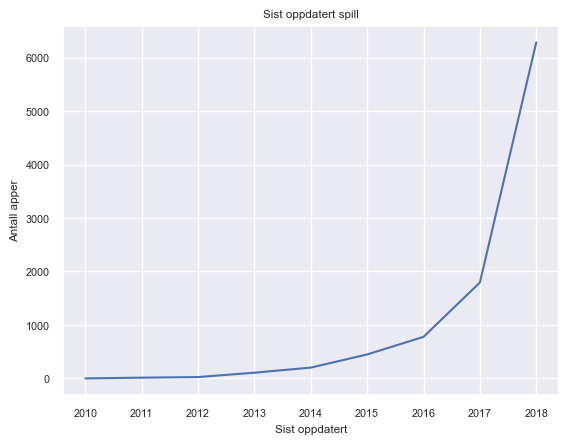

In [275]:
plt.title('Sist oppdatert spill')
sns.lineplot(x=aar.index, y=aar)
plt.ylabel('Antall apper')
plt.xlabel('Sist oppdatert')
plt.show()

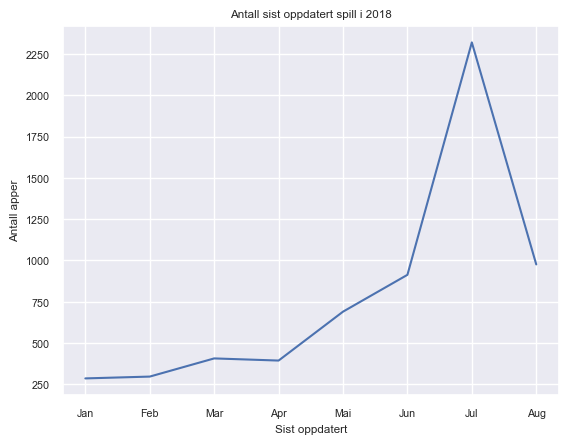

In [276]:
df_2018 = df[df['Last Updated'].dt.year == 2018]
mnd_2018 = df_2018.groupby(df_2018['Last Updated'].dt.month).count()['App'] 

plt.title('Antall sist oppdatert spill i 2018')
sns.lineplot(x=['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug'], y=mnd_2018)
plt.ylabel('Antall apper')
plt.xlabel('Sist oppdatert')
plt.show()

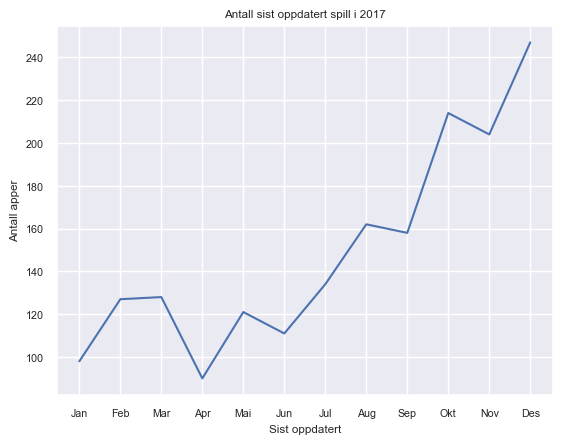

In [277]:
df_2017 = df[df['Last Updated'].dt.year == 2017]
mnd_2017 = df_2017.groupby(df_2017['Last Updated'].dt.month).count()['App'] 

plt.title('Antall sist oppdatert spill i 2017')
sns.lineplot(x=['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des'], y=mnd_2017)
plt.ylabel('Antall apper')
plt.xlabel('Sist oppdatert')
plt.show()

In [278]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [279]:
df.groupby(['Category', 'Content Rating']).sum()[['Reviews', 'Installs']]

Reviews    Installs
Category          Content Rating                      
<ufunc 'isnan'>   Everyone              19        1000
ART_AND_DESIGN    Everyone         1150678    53828100
                  Everyone 10+        7699      500000
                  Teen              260826    60010000
AUTO_AND_VEHICLES Everyone          888172    42130211
...                                    ...         ...
VIDEO_PLAYERS     Teen            42178306  2436156000
WEATHER           Everyone        12006199   349500520
                  Everyone 10+      260137    10000000
                  Mature 17+         20001     1000000
                  Teen                8827      600000

[119 rows x 2 columns]

In [280]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


## Antall apper som støttes

In [281]:
df['AndVer'] = df['Android Ver'].str.slice(0, 3)
df = df.assign(
    AndVer = pd.to_numeric(df['AndVer'].str.replace('[^0-9.]', '', regex=True))
)
#df.dropna()
#df.sort_values(by='AndVer', ascending = False)

ant_apper_stottet = df[df['AndVer'] <= 4.1].count()[0]
ant_apper_stottet

6599

## Prosentandel av appene du kan laste ned

In [282]:
ant_apper_stottet/df.count()[0]

0.6833385109247179

## Sortert etter 

In [283]:
df_every_teen = df[df['Content Rating'].str.contains('Teen|Everyone', regex=True)]
ant_apper_stottet2 = df_every_teen[df_every_teen['AndVer'] <= 4.1].count()[0]
ant_apper_stottet2

6326

In [284]:
ant_apper_stottet2/df.count()[0]

0.6550688619654137

In [285]:
df[df['Genres'].str.contains('Art & Design;Creativity')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [286]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['ggplot'])
sns.set_palette("deep", 10)
plt.figure(figsize=(12,6))

# Laster inn kommaseparert csv-fil til pandas dataframe
df = pd.read_csv("googleplaystore.csv", sep=",")

#______________ Opprydding ______________

# Valgte å fjerne raden med feil antall kolonner
#df = df.drop(df.index[10472])

df.iloc[[10472], [2,3,4,5,6,7,8,9,10,11,12]] = df.iloc[[10472], [1,2,3,4,5,6,7,8,9,10,11]]
df.iloc[[10472], [1]] = 'NaN'
df.iloc[[10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


<Figure size 1200x600 with 0 Axes>

In [287]:
df.iloc[[10472]][['Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver']] = df.iloc[[10472]][['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']]

/var/folders/0h/pp5g9p3x6yb_j3l0x6s_hz4r0000gn/T/ipykernel_1132/3918901909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[[10472]][['Rating', 'Reviews', 'Size', 'Installs', 'Type',


In [288]:
df.iloc[[10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [289]:
df.iloc[[10472], [2,3,4,5,6,7,8,9,10,11,12]] = df.iloc[[10472], [1,2,3,4,5,6,7,8,9,10,11]]
df.iloc[[10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,NaN,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19


In [290]:
# Fjerne duplikater. Altså rader med samme app-navn
df = df.drop_duplicates(subset=['App'])

# Bytter ut k med 000, M med 000000 og Varies with device til -1 og gjør om til heltall (int)
df['Size'] = df['Size'].replace({'k': '*1e3', 'M': '*1e6', 'Varies with device':'-1'}, regex=True).map(pd.eval).astype(int)

# Endrer type til int
df['Reviews'] = df['Reviews'].astype(int)

# Fjerner alt som ikke er tall i kkolonene Installs og Price og gjør om til tall med passende datatype
df = df.assign(
    Installs = pd.to_numeric(df['Installs'].str.replace('[^0-9.]', '', regex=True)),
    Price = pd.to_numeric(df['Price'].str.replace('[^0-9.]', '', regex=True))
)

# Endre streng til standard datoformat 
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%B %d, %Y')

df.head()

ValueError: invalid literal for int() with base 10: '1.9'